In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import copy

In [2]:
filename ='cc_cross_section_no_corr.txt'
df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","incoming ions","survived_ions"])
df["d_survived"] = 1-df["survived_ions"]/df["incoming ions"]
#df.style.hide(axis="index")
geo_filename = "result_geo_corr_factor.txt"
df_geo = pd.read_csv(geo_filename,sep="\t",names=["datatype","targettype","RunID","energy","geo_corr"])
#df_geo.style.hide(axis="index")
result_geo = pd.merge(df, df_geo,how="inner",on=["RunID","datatype","targettype","energy"])
iso_filename = "final_iso_corr_cac_combined.txt"
df_iso = pd.read_csv(iso_filename,sep="\t",names=["datatype","targettype","RunID","energy","iso_corr"])
#df_iso.style.hide(axis="index")
result = pd.merge(result_geo,df_iso,how="inner",on=["RunID","datatype","targettype","energy"])
result

,datatype,targettype,RunID,energy,incoming ions,survived_ions,d_survived,geo_corr,iso_corr
0,exp,c_1086,0181_0001,400,607009,552111,0.090440,1.00227,0.007789
1,exp,c_1086,0101_0001,550,451164,410044,0.091142,1.00161,0.009573
2,exp,c_1086,0127_0001,650,500728,454778,0.091766,1.00079,0.009207
3,exp,c_1086,0168_0001,800,345700,313966,0.091796,1.00048,0.006674
4,exp,c_2198,0183_0001,400,656259,553053,0.157264,1.00442,0.012336
5,exp,c_2198,0103_0001,550,436487,367603,0.157815,1.00209,0.016251
6,exp,c_2198,0130_0001,650,530898,445651,0.160571,1.00093,0.015251
7,exp,c_2198,0170_0001,800,479742,402409,0.161197,1.00099,0.012775
8,exp,c_54,0179_0001,400,569925,537743,0.056467,1.00159,0.005632
9,exp,c_54,0099_0001,550,476356,449093,0.057232,1.00119,0.006372


In [3]:
new_density = 1.851
T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
factor_2198 = (1./T_2198)*(pow(10,27))
factor_1086 = (1./T_1086)*(pow(10,27))
factor_54 = (1./T_54)*(pow(10,27))

In [4]:
cc_2198_val = []
cc_1086_val = []
cc_54_val = []
cc_geo_corr_2198_val = []
cc_geo_corr_1086_val = []
cc_geo_corr_54_val = []
tot_cs_2198_val = []
tot_cs_1086_val = []
tot_cs_54_val = []
energy_vals = ["400","550","650","800"]
for ene in energy_vals:
    dz_2198 = (1-float(result_geo.loc[(result_geo["targettype"] == "c_2198") & (result_geo["energy"] == float(ene))]['d_survived']))/(1-float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['d_survived']))
    d_geo_2198 = float(result_geo.loc[(result_geo["targettype"] == "c_2198") & (result_geo["energy"] == float(ene))]['geo_corr'])/float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['geo_corr'])
    d_iso_2198 = (1-float(result.loc[(result["targettype"] == "c_2198") & (result["energy"] == float(ene))]['iso_corr']))/(1-float(result.loc[(result["targettype"] == "empty") & (result["energy"] == float(ene))]['iso_corr']))
    
    dz_1086 = (1-float(result_geo.loc[(result_geo["targettype"] == "c_1086") & (result_geo["energy"] == float(ene))]['d_survived']))/(1-float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['d_survived']))
    d_geo_1086 = float(result_geo.loc[(result_geo["targettype"] == "c_1086") & (result_geo["energy"] == float(ene))]['geo_corr'])/float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['geo_corr'])
    d_iso_1086 = (1-float(result.loc[(result["targettype"] == "c_1086") & (result["energy"] == float(ene))]['iso_corr']))/(1-float(result.loc[(result["targettype"] == "empty") & (result["energy"] == float(ene))]['iso_corr']))
    
    dz_54 = (1-float(result_geo.loc[(result_geo["targettype"] == "c_54") & (result_geo["energy"] == float(ene))]['d_survived']))/(1-float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['d_survived']))
    d_geo_54 = float(result_geo.loc[(result_geo["targettype"] == "c_54") & (result_geo["energy"] == float(ene))]['geo_corr'])/float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['geo_corr'])
    d_iso_54 = (1-float(result.loc[(result["targettype"] == "c_54") & (result["energy"] == float(ene))]['iso_corr']))/(1-float(result.loc[(result["targettype"] == "empty") & (result["energy"] == float(ene))]['iso_corr']))

    cc_2198 = factor_2198*(-math.log(dz_2198))
    cc_geo_corr_2198 = factor_2198*(-math.log(dz_2198)-math.log(d_geo_2198))
    tot_cs_2198 = factor_2198*(-math.log(dz_2198)-math.log(d_geo_2198)-math.log(d_iso_2198))
    cc_2198_val.append(cc_2198)
    cc_geo_corr_2198_val.append(cc_geo_corr_2198)
    tot_cs_2198_val.append(tot_cs_2198)
    

    cc_54 = factor_54*(-math.log(dz_54))
    cc_geo_corr_54 = factor_54*(-math.log(dz_54)-math.log(d_geo_54))
    tot_cs_54 = factor_54*(-math.log(dz_54)-math.log(d_geo_54)-math.log(d_iso_54))
    cc_54_val.append(cc_54)
    cc_geo_corr_54_val.append(cc_geo_corr_54)
    tot_cs_54_val.append(tot_cs_54)

    cc_1086 = factor_1086*(-math.log(dz_1086))
    cc_geo_corr_1086 = factor_1086*(-math.log(dz_1086)-math.log(d_geo_1086))
    tot_cs_1086 = factor_1086*(-math.log(dz_1086)-math.log(d_geo_1086)-math.log(d_iso_1086))
    cc_1086_val.append(cc_1086)
    cc_geo_corr_1086_val.append(cc_geo_corr_1086)
    tot_cs_1086_val.append(tot_cs_1086)
    #print(cc)
    #print(cc_geo_corr)
    
print(tot_cs_2198_val)
print(tot_cs_1086_val)
print(tot_cs_54_val)




[771.0416411585492, 804.4381867733368, 817.9852985832764, 812.863257681513]
[780.2399145634017, 810.9833935636138, 815.7045352202055, 801.4581340324162]
[790.500509421452, 826.1771017534236, 817.106653077422, 808.913986381144]


/tmp/ipykernel_26719/3306095923.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(result_geo.loc[(result_geo["targettype"] == "c_2198") & (result_geo["energy"] == float(ene))]['d_survived']))/(1-float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_26719/3306095923.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  d_geo_2198 = float(result_geo.loc[(result_geo["targettype"] == "c_2198") & (result_geo["energy"] == float(ene))]['geo_corr'])/float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['geo_corr'])
/tmp/ipykernel_26719/3306095923.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the futu

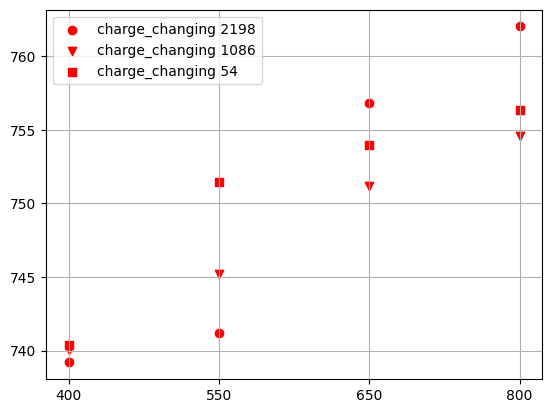

In [5]:
fig, ax = plt.subplots()
ax.scatter(energy_vals,cc_2198_val,label="charge_changing 2198",color='red',marker="o")
ax.scatter(energy_vals,cc_1086_val,label="charge_changing 1086",color ='red',marker="v")
ax.scatter(energy_vals,cc_54_val,label="charge_changing 54",color='red',marker="s")
ax.legend()
ax.grid()

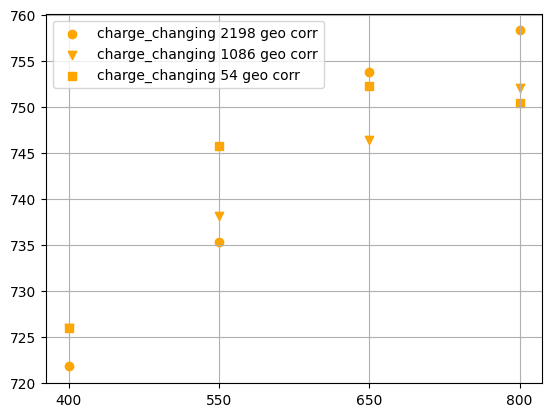

In [6]:
fig, ax = plt.subplots()
ax.scatter(energy_vals,cc_geo_corr_2198_val,label="charge_changing 2198 geo corr",color='orange',marker="o")
ax.scatter(energy_vals,cc_geo_corr_1086_val,label="charge_changing 1086 geo corr",color ='orange',marker="v")
ax.scatter(energy_vals,cc_geo_corr_54_val,label="charge_changing 54 geo corr",color='orange',marker="s")
ax.legend()
ax.grid()

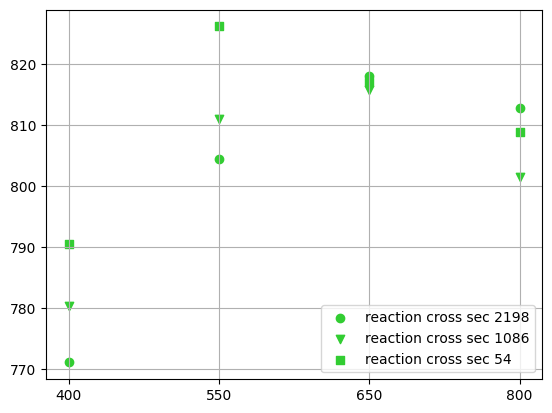

In [7]:
fig, ax = plt.subplots()
ax.scatter(energy_vals,tot_cs_2198_val,label="reaction cross sec 2198",color='limegreen',marker="o")
ax.scatter(energy_vals,tot_cs_1086_val,label="reaction cross sec 1086",color ='limegreen',marker="v")
ax.scatter(energy_vals,tot_cs_54_val,label="reaction cross sec 54",color='limegreen',marker="s")
ax.legend()
ax.grid()

## this is now using also the borders

In [8]:
filename ='summary_cc_no_corr.txt'
dfb = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","incoming ions","survived_ions"])
dfb["d_survived"] = 1-dfb["survived_ions"]/dfb["incoming ions"]


cc_2198_val = []
cc_1086_val = []
cc_54_val = []
cc_geo_corr_2198_val = []
cc_geo_corr_1086_val = []
cc_geo_corr_54_val = []
tot_cs_2198_val = []
tot_cs_1086_val = []
tot_cs_54_val = []
energy_vals = ["400","550","650","800"]
for ene in energy_vals:
    dz_2198 = (1-float(dfb.loc[(dfb["targettype"] == "c_2198") & (dfb["energy"] == float(ene))]['d_survived']))/(1-float(dfb.loc[(dfb["targettype"] == "empty") & (dfb["energy"] == float(ene))]['d_survived']))
    dz_1086 = (1-float(dfb.loc[(dfb["targettype"] == "c_1086") & (dfb["energy"] == float(ene))]['d_survived']))/(1-float(dfb.loc[(dfb["targettype"] == "empty") & (dfb["energy"] == float(ene))]['d_survived']))
    dz_54 = (1-float(dfb.loc[(dfb["targettype"] == "c_54") & (dfb["energy"] == float(ene))]['d_survived']))/(1-float(dfb.loc[(dfb["targettype"] == "empty") & (dfb["energy"] == float(ene))]['d_survived']))
    cc_2198 = factor_2198*(-math.log(dz_2198))
    cc_1086 = factor_1086*(-math.log(dz_1086))
    cc_54 = factor_54*(-math.log(dz_54))
    
    cc_2198_val.append(cc_2198)
    cc_1086_val.append(cc_1086)
    cc_54_val.append(cc_54)

print(cc_54_val)
print(cc_1086_val)
print(cc_2198_val)
    

[736.4604119202913, 747.8852921790086, 749.5705491038603, 754.9165701542107]
[735.4461594979124, 742.2148292832321, 748.1081046437281, 752.8641083422957]
[735.1859325150348, 738.7350500972022, 754.1369826668549, 760.293663857982]


/tmp/ipykernel_26719/163660210.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(dfb.loc[(dfb["targettype"] == "c_2198") & (dfb["energy"] == float(ene))]['d_survived']))/(1-float(dfb.loc[(dfb["targettype"] == "empty") & (dfb["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_26719/163660210.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(dfb.loc[(dfb["targettype"] == "c_1086") & (dfb["energy"] == float(ene))]['d_survived']))/(1-float(dfb.loc[(dfb["targettype"] == "empty") & (dfb["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_26719/163660210.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(dfb.loc[(dfb["targettype

Text(0.5, 0.98, 'including borders')

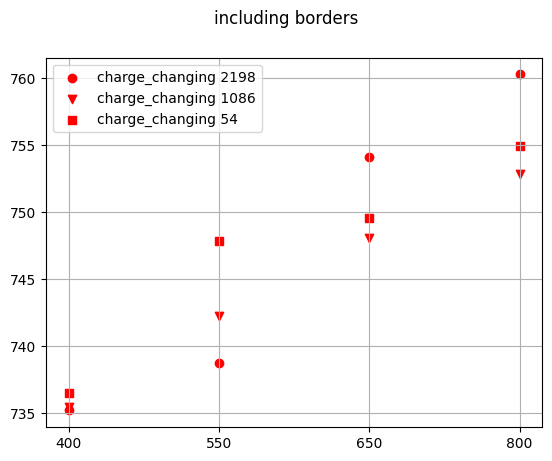

In [9]:
fig, ax = plt.subplots()
ax.scatter(energy_vals,cc_2198_val,label="charge_changing 2198",color='red',marker="o")
ax.scatter(energy_vals,cc_1086_val,label="charge_changing 1086",color ='red',marker="v")
ax.scatter(energy_vals,cc_54_val,label="charge_changing 54",color='red',marker="s")
ax.legend()
ax.grid()
fig.suptitle("including borders")

In [10]:
dfb

,datatype,targettype,RunID,energy,incoming ions,survived_ions,d_survived
0,exp,c_1086,0181_0001,400,607009,552757,0.089376
1,exp,c_1086,0101_0001,550,451164,410394,0.090366
2,exp,c_1086,0127_0001,650,500728,455163,0.090998
3,exp,c_1086,0168_0001,800,345700,314110,0.091380
4,exp,c_2198,0183_0001,400,656259,553899,0.155975
5,exp,c_2198,0103_0001,550,436487,367989,0.156930
6,exp,c_2198,0130_0001,650,530898,446137,0.159656
7,exp,c_2198,0170_0001,800,479742,402666,0.160661
8,exp,c_54,0179_0001,400,569925,538232,0.055609
9,exp,c_54,0099_0001,550,476356,449422,0.056542


## and now using borders  and condition of having tref

[735.9405882713211, 734.8063505593045, 749.6555069958429, 756.0377049848936]
[736.1922535808922, 742.3654272790964, 748.1513128972068, 752.8482804525312]
[735.3206435019596, 738.7655104242176, 754.2823786757937, 760.3149262562623]


/tmp/ipykernel_26719/2621045631.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(dfb_ref.loc[(dfb_ref["targettype"] == "c_2198") & (dfb_ref["energy"] == float(ene))]['d_survived']))/(1-float(dfb_ref.loc[(dfb_ref["targettype"] == "empty") & (dfb_ref["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_26719/2621045631.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(dfb_ref.loc[(dfb_ref["targettype"] == "c_1086") & (dfb_ref["energy"] == float(ene))]['d_survived']))/(1-float(dfb_ref.loc[(dfb_ref["targettype"] == "empty") & (dfb_ref["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_26719/2621045631.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) 

Text(0.5, 0.98, 'including borders and tref')

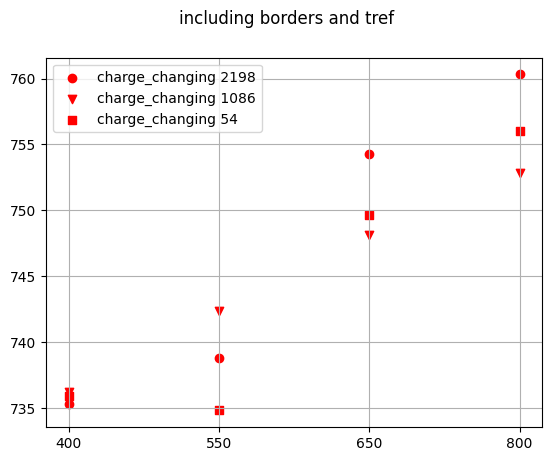

In [11]:
#filename ='summary_cc_no_corr_with_border_with_tref.txt'
filename ='foo_foo_foo.txt'
dfb_ref = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","incoming ions","survived_ions"])
dfb_ref["d_survived"] = 1-dfb_ref["survived_ions"]/dfb_ref["incoming ions"]


cc_2198_val = []
cc_1086_val = []
cc_54_val = []
cc_geo_corr_2198_val = []
cc_geo_corr_1086_val = []
cc_geo_corr_54_val = []
tot_cs_2198_val = []
tot_cs_1086_val = []
tot_cs_54_val = []
energy_vals = ["400","550","650","800"]
for ene in energy_vals:
    dz_2198 = (1-float(dfb_ref.loc[(dfb_ref["targettype"] == "c_2198") & (dfb_ref["energy"] == float(ene))]['d_survived']))/(1-float(dfb_ref.loc[(dfb_ref["targettype"] == "empty") & (dfb_ref["energy"] == float(ene))]['d_survived']))
    dz_1086 = (1-float(dfb_ref.loc[(dfb_ref["targettype"] == "c_1086") & (dfb_ref["energy"] == float(ene))]['d_survived']))/(1-float(dfb_ref.loc[(dfb_ref["targettype"] == "empty") & (dfb_ref["energy"] == float(ene))]['d_survived']))
    dz_54 = (1-float(dfb_ref.loc[(dfb_ref["targettype"] == "c_54") & (dfb_ref["energy"] == float(ene))]['d_survived']))/(1-float(dfb_ref.loc[(dfb_ref["targettype"] == "empty") & (dfb_ref["energy"] == float(ene))]['d_survived']))
    cc_2198 = factor_2198*(-math.log(dz_2198))
    cc_1086 = factor_1086*(-math.log(dz_1086))
    cc_54 = factor_54*(-math.log(dz_54))
    
    cc_2198_val.append(cc_2198)
    cc_1086_val.append(cc_1086)
    cc_54_val.append(cc_54)

print(cc_54_val)
print(cc_1086_val)
print(cc_2198_val)

fig, ax = plt.subplots()
ax.scatter(energy_vals,cc_2198_val,label="charge_changing 2198",color='red',marker="o")
ax.scatter(energy_vals,cc_1086_val,label="charge_changing 1086",color ='red',marker="v")
ax.scatter(energy_vals,cc_54_val,label="charge_changing 54",color='red',marker="s")
ax.legend()
ax.grid()
fig.suptitle("including borders and tref")

## now usign always tref as reference when comparing times; using tref from both mdpp modules..

[738.1454958817533, 748.4851426720895, 750.4267926706159, 755.8711655593117]
[736.8364464579071, 742.8107799690301, 748.6437261582848, 752.3976631464271]
[735.2706959710674, 738.8916837802063, 754.6353263172989, 759.9724384323606]


/tmp/ipykernel_26719/3549111961.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(dfb_ref.loc[(dfb_ref["targettype"] == "c_2198") & (dfb_ref["energy"] == float(ene))]['d_survived']))/(1-float(dfb_ref.loc[(dfb_ref["targettype"] == "empty") & (dfb_ref["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_26719/3549111961.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(dfb_ref.loc[(dfb_ref["targettype"] == "c_1086") & (dfb_ref["energy"] == float(ene))]['d_survived']))/(1-float(dfb_ref.loc[(dfb_ref["targettype"] == "empty") & (dfb_ref["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_26719/3549111961.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) 

Text(0.5, 0.98, 'including borders and tref of both sides, also for time comparing')

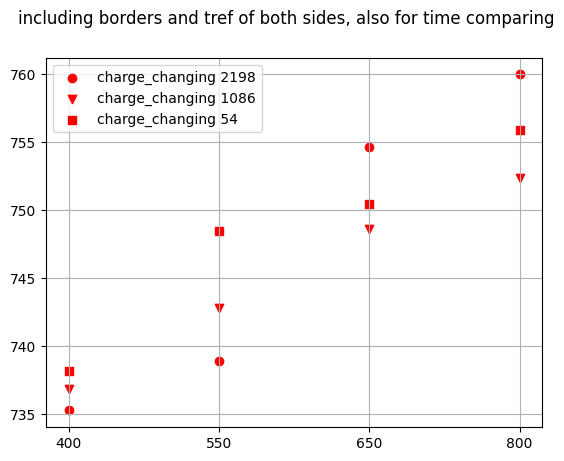

In [12]:
filename ='summary_with_tref.txt'
#filename ='foo_foo_foo.txt'
dfb_ref = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","incoming ions","survived_ions"])
dfb_ref["d_survived"] = 1-dfb_ref["survived_ions"]/dfb_ref["incoming ions"]

geo_filename = "tref_result_geo_corr_factor.txt"
df_geo = pd.read_csv(geo_filename,sep="\t",names=["datatype","targettype","RunID","energy","geo_corr"])
#df_geo.style.hide(axis="index")
result_geo = pd.merge(dfb_ref, df_geo,how="inner",on=["RunID","datatype","targettype","energy"])

cc_2198_val = []
cc_1086_val = []
cc_54_val = []
cc_geo_corr_2198_val = []
cc_geo_corr_1086_val = []
cc_geo_corr_54_val = []
tot_cs_2198_val = []
tot_cs_1086_val = []
tot_cs_54_val = []
energy_vals = ["400","550","650","800"]
for ene in energy_vals:
    dz_2198 = (1-float(dfb_ref.loc[(dfb_ref["targettype"] == "c_2198") & (dfb_ref["energy"] == float(ene))]['d_survived']))/(1-float(dfb_ref.loc[(dfb_ref["targettype"] == "empty") & (dfb_ref["energy"] == float(ene))]['d_survived']))
    dz_1086 = (1-float(dfb_ref.loc[(dfb_ref["targettype"] == "c_1086") & (dfb_ref["energy"] == float(ene))]['d_survived']))/(1-float(dfb_ref.loc[(dfb_ref["targettype"] == "empty") & (dfb_ref["energy"] == float(ene))]['d_survived']))
    dz_54 = (1-float(dfb_ref.loc[(dfb_ref["targettype"] == "c_54") & (dfb_ref["energy"] == float(ene))]['d_survived']))/(1-float(dfb_ref.loc[(dfb_ref["targettype"] == "empty") & (dfb_ref["energy"] == float(ene))]['d_survived']))

    d_geo_2198 = float(result_geo.loc[(result_geo["targettype"] == "c_2198") & (result_geo["energy"] == float(ene))]['geo_corr'])/float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['geo_corr'])    
    d_geo_1086 = float(result_geo.loc[(result_geo["targettype"] == "c_1086") & (result_geo["energy"] == float(ene))]['geo_corr'])/float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['geo_corr'])
    d_geo_54 = float(result_geo.loc[(result_geo["targettype"] == "c_54") & (result_geo["energy"] == float(ene))]['geo_corr'])/float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['geo_corr'])

    
    cc_2198 = factor_2198*(-math.log(dz_2198))
    cc_1086 = factor_1086*(-math.log(dz_1086))
    cc_54 = factor_54*(-math.log(dz_54))

    cc_geo_corr_54 = factor_54*(-math.log(dz_54)-math.log(d_geo_54))
    cc_geo_corr_1086 = factor_1086*(-math.log(dz_1086)-math.log(d_geo_1086))
    cc_geo_corr_2198 = factor_2198*(-math.log(dz_2198)-math.log(d_geo_2198))
    

    
    
    cc_2198_val.append(cc_2198)
    cc_1086_val.append(cc_1086)
    cc_54_val.append(cc_54)

    cc_geo_corr_54_val.append(cc_geo_corr_54)
    cc_geo_corr_1086_val.append(cc_geo_corr_1086)
    cc_geo_corr_2198_val.append(cc_geo_corr_2198)



print(cc_54_val)
print(cc_1086_val)
print(cc_2198_val)

fig, ax = plt.subplots()
ax.scatter(energy_vals,cc_2198_val,label="charge_changing 2198",color='red',marker="o")
ax.scatter(energy_vals,cc_1086_val,label="charge_changing 1086",color ='red',marker="v")
ax.scatter(energy_vals,cc_54_val,label="charge_changing 54",color='red',marker="s")
ax.legend()
ax.grid()
fig.suptitle("including borders and tref of both sides, also for time comparing")

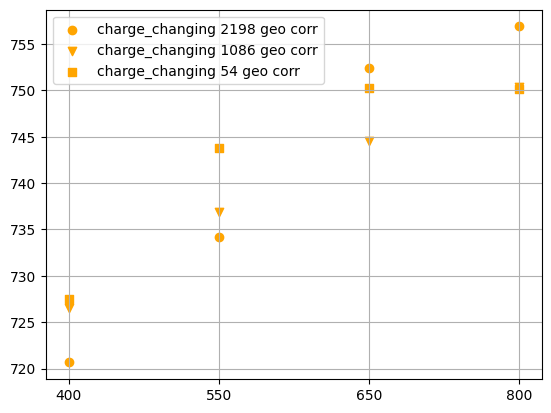

In [13]:
fig, ax = plt.subplots()
ax.scatter(energy_vals,cc_geo_corr_2198_val,label="charge_changing 2198 geo corr",color='orange',marker="o")
ax.scatter(energy_vals,cc_geo_corr_1086_val,label="charge_changing 1086 geo corr",color ='orange',marker="v")
ax.scatter(energy_vals,cc_geo_corr_54_val,label="charge_changing 54 geo corr",color='orange',marker="s")
ax.legend()
ax.grid()

## using tref,borders and best ways to find physical hit in twim

/tmp/ipykernel_26719/1404141473.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(dfb_ref.loc[(dfb_ref["targettype"] == "c_2198") & (dfb_ref["energy"] == float(ene))]['d_survived']))/(1-float(dfb_ref.loc[(dfb_ref["targettype"] == "empty") & (dfb_ref["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_26719/1404141473.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(dfb_ref.loc[(dfb_ref["targettype"] == "c_1086") & (dfb_ref["energy"] == float(ene))]['d_survived']))/(1-float(dfb_ref.loc[(dfb_ref["targettype"] == "empty") & (dfb_ref["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_26719/1404141473.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) 

[737.9023155314158, 748.620888558533, 750.5033540502709, 754.1833600917771]
[736.4165011251966, 742.868773428783, 748.6120634596352, 752.2602706822166]
[734.8785295168668, 738.7130371403603, 754.563576812104, 759.6343330353412]


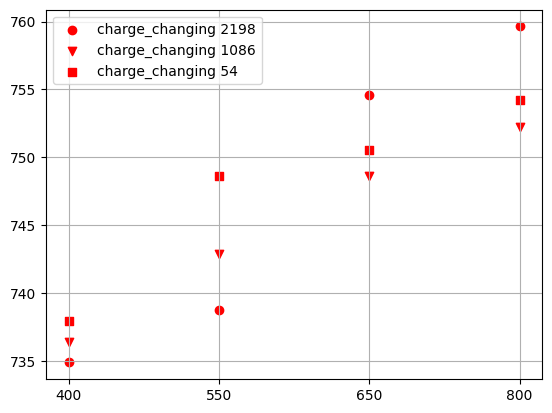

In [14]:
filename ='summary_with_tref_physical.txt'
dfb_ref = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","incoming ions","survived_ions"])
dfb_ref["d_survived"] = 1-dfb_ref["survived_ions"]/dfb_ref["incoming ions"]

geo_filename = "tref_result_geo_corr_factor.txt"
#geo_filename = "tref_result_geo_corr_factor_physical.txt"
df_geo = pd.read_csv(geo_filename,sep="\t",names=["datatype","targettype","RunID","energy","geo_corr"])
#df_geo.style.hide(axis="index")
result_geo = pd.merge(dfb_ref, df_geo,how="inner",on=["RunID","datatype","targettype","energy"])
result = pd.merge(result_geo,df_iso,how="inner",on=["RunID","datatype","targettype","energy"])

cc_2198_val = []
cc_1086_val = []
cc_54_val = []
cc_geo_corr_2198_val = []
cc_geo_corr_1086_val = []
cc_geo_corr_54_val = []
tot_cs_2198_val = []
tot_cs_1086_val = []
tot_cs_54_val = []
energy_vals = ["400","550","650","800"]
for ene in energy_vals:
    dz_2198 = (1-float(dfb_ref.loc[(dfb_ref["targettype"] == "c_2198") & (dfb_ref["energy"] == float(ene))]['d_survived']))/(1-float(dfb_ref.loc[(dfb_ref["targettype"] == "empty") & (dfb_ref["energy"] == float(ene))]['d_survived']))
    dz_1086 = (1-float(dfb_ref.loc[(dfb_ref["targettype"] == "c_1086") & (dfb_ref["energy"] == float(ene))]['d_survived']))/(1-float(dfb_ref.loc[(dfb_ref["targettype"] == "empty") & (dfb_ref["energy"] == float(ene))]['d_survived']))
    dz_54 = (1-float(dfb_ref.loc[(dfb_ref["targettype"] == "c_54") & (dfb_ref["energy"] == float(ene))]['d_survived']))/(1-float(dfb_ref.loc[(dfb_ref["targettype"] == "empty") & (dfb_ref["energy"] == float(ene))]['d_survived']))

    d_geo_2198 = float(result_geo.loc[(result_geo["targettype"] == "c_2198") & (result_geo["energy"] == float(ene))]['geo_corr'])/float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['geo_corr'])    
    d_geo_1086 = float(result_geo.loc[(result_geo["targettype"] == "c_1086") & (result_geo["energy"] == float(ene))]['geo_corr'])/float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['geo_corr'])
    d_geo_54 = float(result_geo.loc[(result_geo["targettype"] == "c_54") & (result_geo["energy"] == float(ene))]['geo_corr'])/float(result_geo.loc[(result_geo["targettype"] == "empty") & (result_geo["energy"] == float(ene))]['geo_corr'])


    d_iso_2198 = (1-float(result.loc[(result["targettype"] == "c_2198") & (result["energy"] == float(ene))]['iso_corr']))/(1-float(result.loc[(result["targettype"] == "empty") & (result["energy"] == float(ene))]['iso_corr']))
    d_iso_1086 = (1-float(result.loc[(result["targettype"] == "c_1086") & (result["energy"] == float(ene))]['iso_corr']))/(1-float(result.loc[(result["targettype"] == "empty") & (result["energy"] == float(ene))]['iso_corr']))
    d_iso_54 = (1-float(result.loc[(result["targettype"] == "c_54") & (result["energy"] == float(ene))]['iso_corr']))/(1-float(result.loc[(result["targettype"] == "empty") & (result["energy"] == float(ene))]['iso_corr']))

    
    cc_2198 = factor_2198*(-math.log(dz_2198))
    cc_1086 = factor_1086*(-math.log(dz_1086))
    cc_54 = factor_54*(-math.log(dz_54))

    cc_geo_corr_54 = factor_54*(-math.log(dz_54)-math.log(d_geo_54))
    cc_geo_corr_1086 = factor_1086*(-math.log(dz_1086)-math.log(d_geo_1086))
    cc_geo_corr_2198 = factor_2198*(-math.log(dz_2198)-math.log(d_geo_2198))
    

    
    
    cc_2198_val.append(cc_2198)
    cc_1086_val.append(cc_1086)
    cc_54_val.append(cc_54)

    cc_geo_corr_54_val.append(cc_geo_corr_54)
    cc_geo_corr_1086_val.append(cc_geo_corr_1086)
    cc_geo_corr_2198_val.append(cc_geo_corr_2198)

    tot_cs_2198 = factor_2198*(-math.log(dz_2198)-math.log(d_geo_2198)-math.log(d_iso_2198))
    tot_cs_1086 = factor_1086*(-math.log(dz_1086)-math.log(d_geo_1086)-math.log(d_iso_1086))
    tot_cs_54 = factor_54*(-math.log(dz_54)-math.log(d_geo_54)-math.log(d_iso_54))


    tot_cs_2198_val.append(tot_cs_2198)
    tot_cs_1086_val.append(tot_cs_1086)
    tot_cs_54_val.append(tot_cs_54)

print(cc_54_val)
print(cc_1086_val)
print(cc_2198_val)


fig, ax = plt.subplots()
ax.scatter(energy_vals,cc_2198_val,label="charge_changing 2198",color='red',marker="o")
ax.scatter(energy_vals,cc_1086_val,label="charge_changing 1086",color ='red',marker="v")
ax.scatter(energy_vals,cc_54_val,label="charge_changing 54",color='red',marker="s")
ax.legend()
ax.grid()
#fig.suptitle("including borders and tref of both sides, also for time comparing")
fig.savefig("charge_changing_no_corr.png")

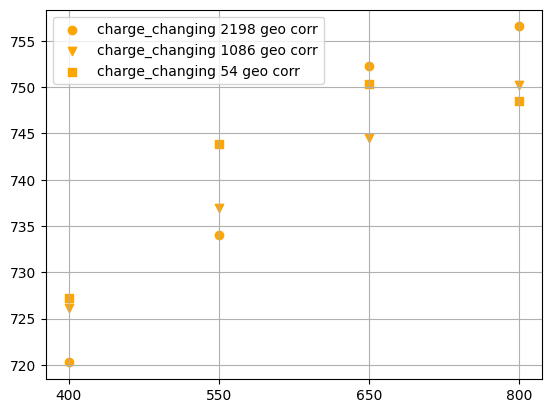

In [15]:
fig, ax = plt.subplots()
ax.scatter(energy_vals,cc_geo_corr_2198_val,label="charge_changing 2198 geo corr",color='orange',marker="o")
ax.scatter(energy_vals,cc_geo_corr_1086_val,label="charge_changing 1086 geo corr",color ='orange',marker="v")
ax.scatter(energy_vals,cc_geo_corr_54_val,label="charge_changing 54 geo corr",color='orange',marker="s")
ax.legend()
ax.grid()
fig.savefig("geo_corr_charge_changing.png")

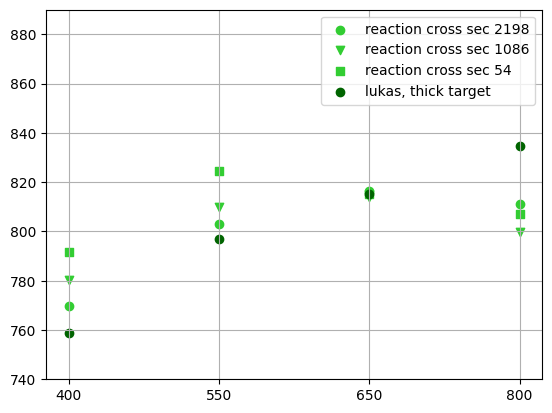

In [16]:
tot_vals_lukas = [758.6,797.0,815.0,834.6] #thick target 2198
fig, ax = plt.subplots()
ax.scatter(energy_vals,tot_cs_2198_val,label="reaction cross sec 2198",color='limegreen',marker="o")
ax.scatter(energy_vals,tot_cs_1086_val,label="reaction cross sec 1086",color ='limegreen',marker="v")
ax.scatter(energy_vals,tot_cs_54_val,label="reaction cross sec 54",color='limegreen',marker="s")
ax.scatter(energy_vals,tot_vals_lukas,label="lukas, thick target",color='darkgreen',marker="o")
ax.set_ylim(740,890)
ax.legend()
ax.grid()
fig.savefig("reaction_cross_section.png")

## mw2 vs mw3 plots

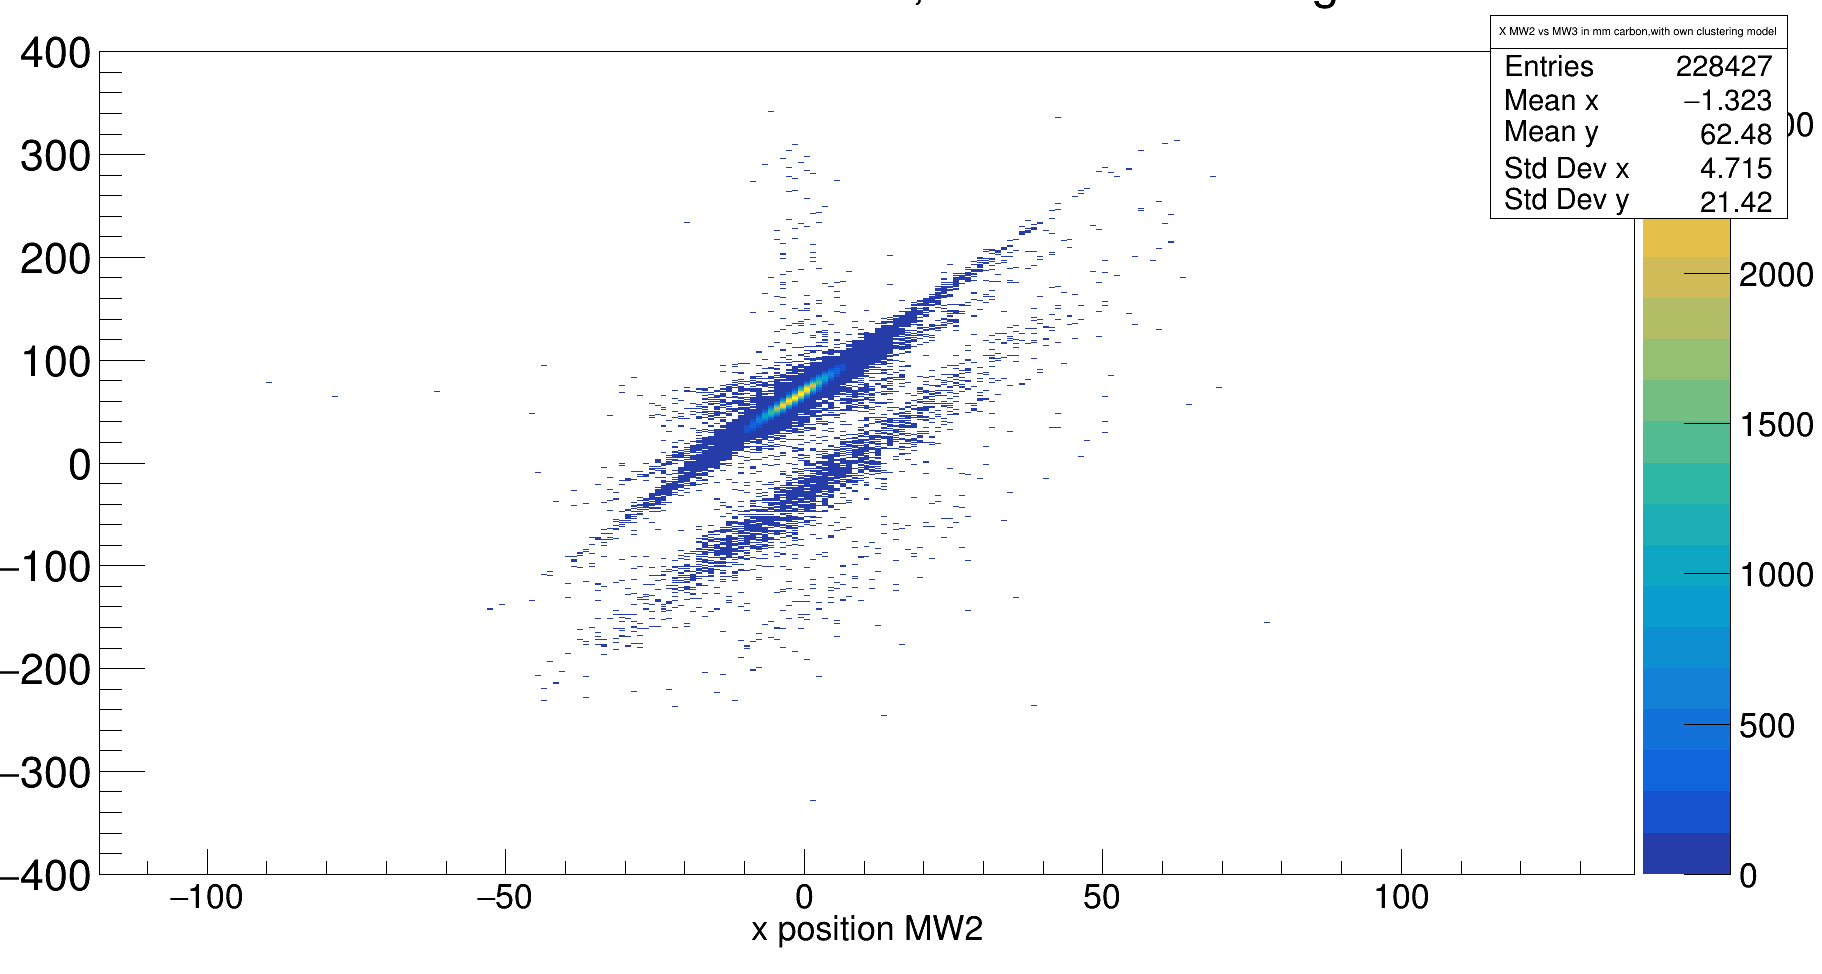

In [17]:
from IPython import display
display.Image("mw2_vs_mw3.png")

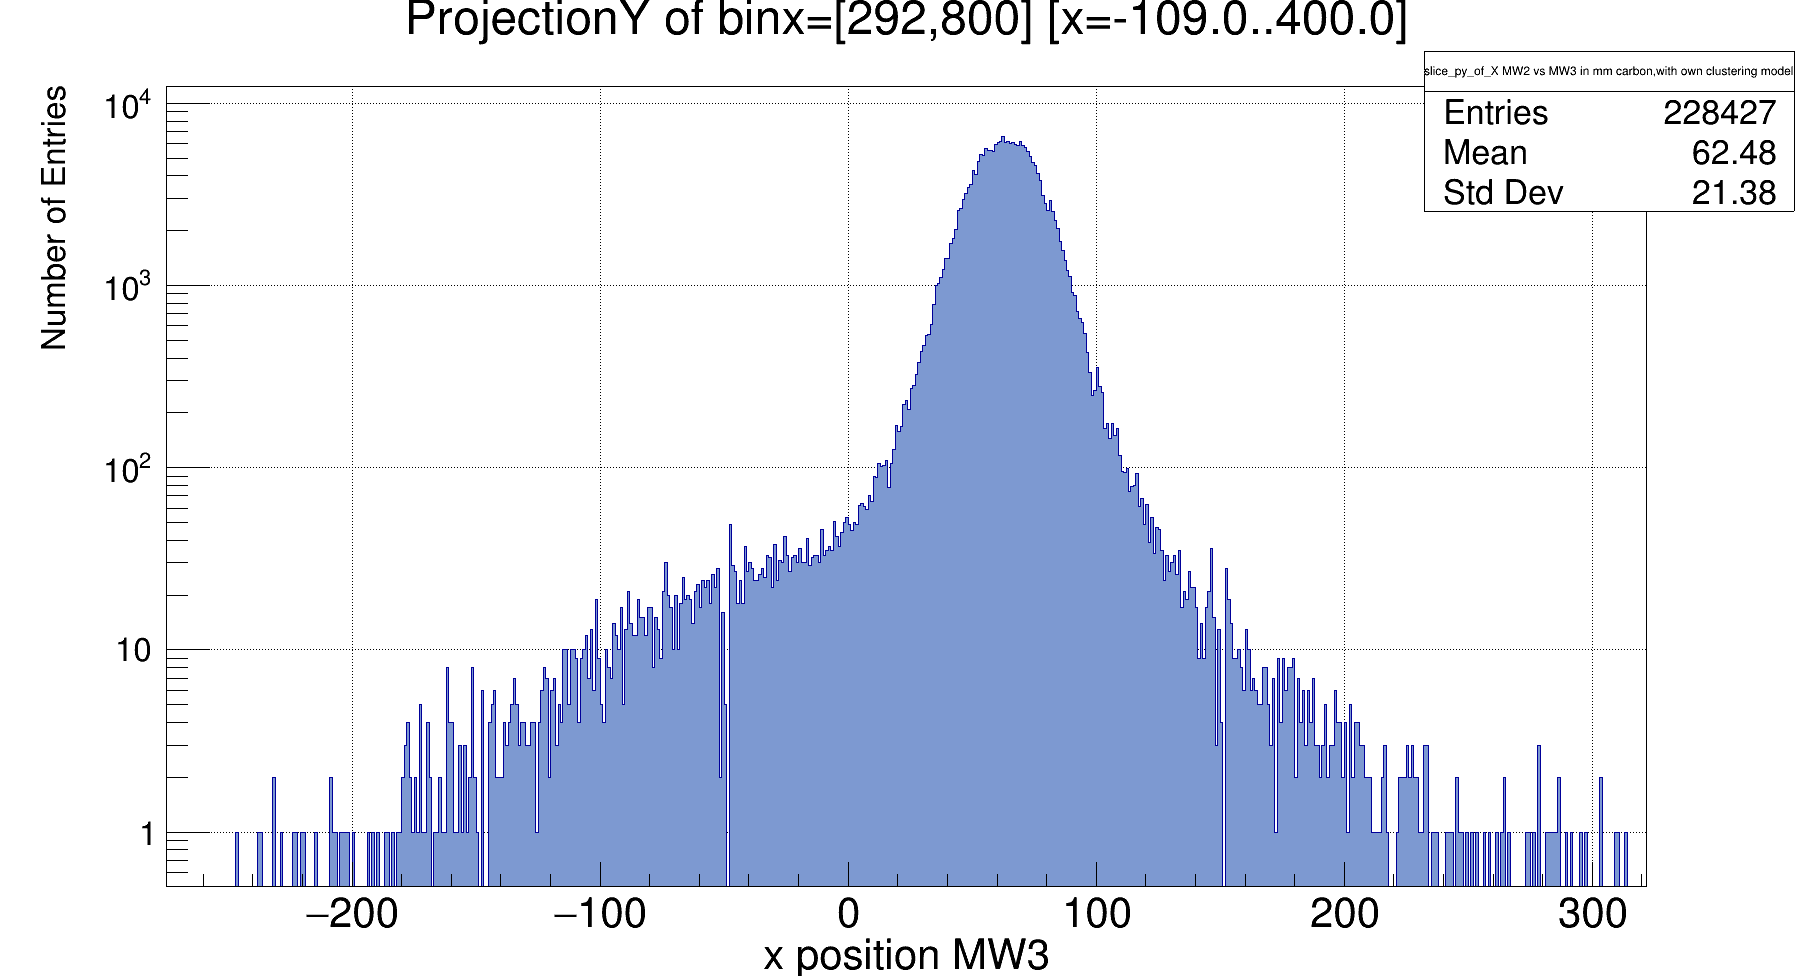

In [18]:
display.Image("proj_mw3.png")

In [19]:
#dfb_ref
#result
result.columns =["data_type","targettype","RunID","energy","incoming ions","survived ions","rate charge changing", "geo_corr","iso_corr"] 
result

,data_type,targettype,RunID,energy,incoming ions,survived ions,rate charge changing,geo_corr,iso_corr
0,exp,c_1086,0181_0001,400,606578,553087,0.088185,1.00186,0.007789
1,exp,c_1086,0101_0001,550,451137,410389,0.090323,1.00146,0.009573
2,exp,c_1086,0127_0001,650,500688,455166,0.090919,1.00069,0.009207
3,exp,c_1086,0168_0001,800,345654,314319,0.090654,1.00042,0.006674
4,exp,c_2198,0183_0001,400,655762,554292,0.154736,1.00381,0.012336
5,exp,c_2198,0103_0001,550,436457,368007,0.156831,1.00182,0.016251
6,exp,c_2198,0130_0001,650,530869,446135,0.159614,1.00074,0.015251
7,exp,c_2198,0170_0001,800,479681,402966,0.159929,1.00085,0.012775
8,exp,c_54,0179_0001,400,569503,538550,0.054351,1.00137,0.005632
9,exp,c_54,0099_0001,550,476323,449425,0.056470,1.00111,0.006372


## now plotting all reactions rate (charge changing + carbon 11) vs 11c rate

In [27]:
all_reac_rate =[]
c11_rate =[]
energy_vals = ["400","550","650","800"]
for ene in energy_vals:
    c11_rate_2198 = (1-float(result.loc[(result["targettype"] == "c_2198") & (result["energy"] == float(ene))]["rate charge changing"]))*(float(result.loc[(result["targettype"] == "c_2198") & (result["energy"] == float(ene))]["iso_corr"]))
    all_reac_rate_2198 = (float(result.loc[(result["targettype"] == "c_2198") & (result["energy"] == float(ene))]["rate charge changing"])) + c11_rate_2198
    #print(c11_rate_2198)
    #print((float(result.loc[(result["targettype"] == "c_2198") & (result["energy"] == float(ene))]["rate charge changing"])))
    c11_rate.append(c11_rate_2198)
    all_reac_rate.append(all_reac_rate_2198)
print(all_reac_rate)
print(c11_rate)

[0.16516327805087824, 0.17053328267458195, 0.17243015966462533, 0.17066085536054165]
[0.010427261020309197, 0.013702254646620398, 0.012816394310084031, 0.010731652411081531]


/tmp/ipykernel_26719/519766440.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  c11_rate_2198 = (1-float(result.loc[(result["targettype"] == "c_2198") & (result["energy"] == float(ene))]["rate charge changing"]))*(float(result.loc[(result["targettype"] == "c_2198") & (result["energy"] == float(ene))]["iso_corr"]))
/tmp/ipykernel_26719/519766440.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  all_reac_rate_2198 = (float(result.loc[(result["targettype"] == "c_2198") & (result["energy"] == float(ene))]["rate charge changing"])) + c11_rate_2198


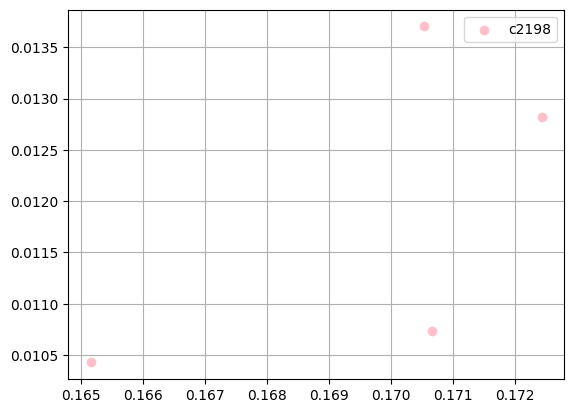

In [25]:
fig, ax = plt.subplots()
ax.scatter(all_reac_rate,c11_rate,label="c2198",color='pink',marker="o")

ax.legend()
ax.grid()